In [1]:
%pip install fastai
import pandas as pd
import torch
import numpy as np

In [2]:
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [3]:
fish_data = pd.read_csv("/content/drive/MyDrive/Data/new_clean_fish_data.csv", index_col=0)

In [4]:
fish_data.head()

,presence,origin,seasonal,event_year,latitude,longitude,order_as_num,family_as_num,genus_as_num,category_as_num
0,1,1,1,1976.00,-15.38,35.55,0,0,0,0
1,1,1,1,1995.00,-9.55,33.89,0,0,0,0
2,1,1,1,1993.00,21.52,-87.74,1,1,1,0
3,1,1,1,1979.00,8.92,-69.51,1,2,2,0
4,1,1,1,2014.00,6.62,80.22,0,3,3,1


In [5]:
fish_data.describe()

,presence,origin,seasonal,event_year,latitude,longitude,order_as_num,family_as_num,genus_as_num,category_as_num
count,35447.00,35447.00,35447.00,35447.00,35447.00,35447.00,35447.00,35447.00,35447.00,35447.00
mean,1.03,1.07,1.00,1989.73,7.54,-32.20,2.27,13.68,116.59,0.71
std,0.30,0.37,0.00,27.24,11.50,71.15,2.02,16.06,98.39,1.36
min,1.00,1.00,1.00,1700.00,-38.93,-112.17,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.00,1977.00,5.49,-83.98,1.00,4.00,21.00,0.00
50%,1.00,1.00,1.00,1999.00,8.51,-75.29,2.00,8.00,91.00,0.00
75%,1.00,1.00,1.00,2010.00,11.00,34.40,3.00,15.00,206.00,1.00
max,6.00,5.00,1.00,2022.00,40.01,161.75,15.00,72.00,348.00,7.00


In [6]:
for column in fish_data.columns:
    fish_data[column] = fish_data[column]  / fish_data[column].abs().max()
fish_data.head()

,presence,origin,seasonal,event_year,latitude,longitude,order_as_num,family_as_num,genus_as_num,category_as_num
0,0.17,0.20,1.00,0.98,-0.38,0.22,0.00,0.00,0.00,0.00
1,0.17,0.20,1.00,0.99,-0.24,0.21,0.00,0.00,0.00,0.00
2,0.17,0.20,1.00,0.99,0.54,-0.54,0.07,0.01,0.00,0.00
3,0.17,0.20,1.00,0.98,0.22,-0.43,0.07,0.03,0.01,0.00
4,0.17,0.20,1.00,1.00,0.17,0.50,0.00,0.04,0.01,0.14


In [7]:
#splits = RandomSplitter(seed=42)(fish_data)
splits = RandomSplitter(valid_pct=0.2)(range_of(fish_data))

In [14]:
dls = TabularPandas(
    fish_data, splits=splits,
    #procs = [Categorify, FillMissing, Normalize],
    procs = [Categorify],
    cat_names=["category_as_num","order_as_num","family_as_num","genus_as_num", "seasonal", "origin", "presence"],
    cont_names=["event_year"],
    y_names=["latitude", "longitude"],
).dataloaders(path=".", bs=256)

In [15]:
#dls.batch_size = 128


In [27]:
learn = tabular_learner(dls, metrics=accuracy_multi, layers=[10,10])

In [28]:
print(dls.bs)

256


SuggestedLRs(slide=0.033113110810518265, valley=0.0030199517495930195)

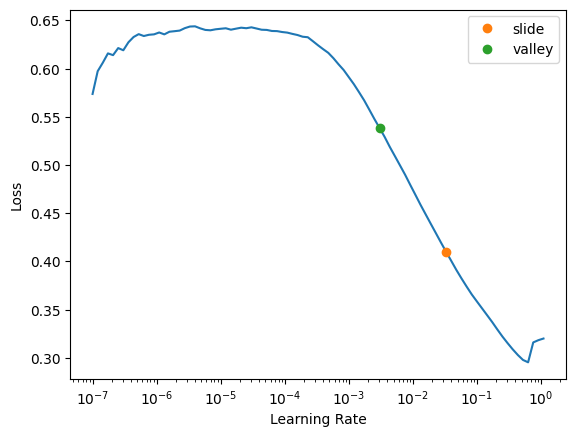

In [29]:
learn.lr_find(suggest_funcs=(slide, valley))

In [30]:
#??learn.fit

In [31]:
learn.fit(16, lr=0.01)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.015308,0.007325,0.570250,00:01
1,0.007974,0.007161,0.577303,00:01
2,0.006959,0.006083,0.576386,00:01
3,0.006701,0.006033,0.571731,00:01
4,0.006426,0.006210,0.573917,00:01
5,0.006242,0.005764,0.572648,00:01
6,0.005852,0.005465,0.577797,00:01
7,0.005873,0.005914,0.576880,00:01
8,0.005747,0.005674,0.576033,00:01
9,0.005900,0.006183,0.586190,00:01


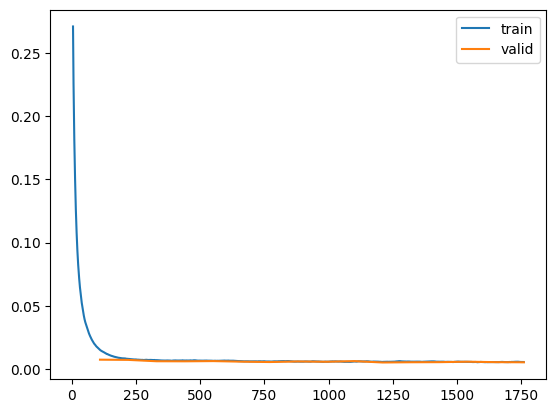

In [33]:
learn.recorder.plot_loss()

In [47]:
#fish_data.head()
pred_fish_data = fish_data.drop(columns=["latitude", "longitude"])
pred_fish_data.iloc[0]

presence          0.17
origin            0.20
seasonal          1.00
event_year        0.98
order_as_num      0.00
family_as_num     0.00
genus_as_num      0.00
category_as_num   0.00
Name: 0, dtype: float64

In [51]:
fish_data.iloc[2]

presence           0.17
origin             0.20
seasonal           1.00
event_year         0.99
latitude           0.54
longitude         -0.54
order_as_num       0.07
family_as_num      0.01
genus_as_num       0.00
category_as_num    0.00
Name: 2, dtype: float64

In [52]:
fish_data.head()

,presence,origin,seasonal,event_year,latitude,longitude,order_as_num,family_as_num,genus_as_num,category_as_num
0,0.17,0.20,1.00,0.98,-0.38,0.22,0.00,0.00,0.00,0.00
1,0.17,0.20,1.00,0.99,-0.24,0.21,0.00,0.00,0.00,0.00
2,0.17,0.20,1.00,0.99,0.54,-0.54,0.07,0.01,0.00,0.00
3,0.17,0.20,1.00,0.98,0.22,-0.43,0.07,0.03,0.01,0.00
4,0.17,0.20,1.00,1.00,0.17,0.50,0.00,0.04,0.01,0.14


In [53]:
learn.predict(pred_fish_data.iloc[2])

(   category_as_num  order_as_num  family_as_num  genus_as_num  seasonal  \
 0             1.00          0.00           0.00          0.00      1.00   
 
    origin  presence  event_year  latitude  longitude  
 0    0.00      0.00        0.99      0.30      -0.12  ,
 tensor([ 0.3010, -0.1163]),
 tensor([ 0.3010, -0.1163]))